In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

In [2]:
pd.__version__

'1.0.0'

In [3]:
data = pd.read_pickle("./catalog.helios.public.20100101-20160101.pkl")

In [4]:
data.head()

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI,TBL_DAYTIME,...,GWN_CLOUDINESS,GWN_GHI,PSU_DAYTIME,PSU_CLEARSKY_GHI,PSU_CLOUDINESS,PSU_GHI,SXF_DAYTIME,SXF_CLEARSKY_GHI,SXF_CLOUDINESS,SXF_GHI
iso-datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-01 00:00:00,nan,nan,NaN,nan,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.500000,0.0,0.0,night,-1.500000,0.0,0.0,night,-3.800000
2010-01-01 00:15:00,nan,nan,NaN,nan,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.493333,0.0,0.0,night,-1.446667,0.0,0.0,night,-3.893333
2010-01-01 00:30:00,nan,nan,NaN,nan,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.420000,0.0,0.0,night,-1.766667,0.0,0.0,night,-4.166667
2010-01-01 00:45:00,nan,nan,NaN,nan,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.533333,0.0,0.0,night,-2.033333,0.0,0.0,night,-4.040000
2010-01-01 01:00:00,nan,nan,NaN,nan,NaN,0.0,0.0,night,-4.1,0.0,...,night,-7.586667,0.0,0.0,night,-2.006667,0.0,0.0,night,-4.133333


In [5]:
data.columns

Index(['ncdf_path', 'hdf5_8bit_path', 'hdf5_8bit_offset', 'hdf5_16bit_path',
       'hdf5_16bit_offset', 'BND_DAYTIME', 'BND_CLEARSKY_GHI',
       'BND_CLOUDINESS', 'BND_GHI', 'TBL_DAYTIME', 'TBL_CLEARSKY_GHI',
       'TBL_CLOUDINESS', 'TBL_GHI', 'DRA_DAYTIME', 'DRA_CLEARSKY_GHI',
       'DRA_CLOUDINESS', 'DRA_GHI', 'FPK_DAYTIME', 'FPK_CLEARSKY_GHI',
       'FPK_CLOUDINESS', 'FPK_GHI', 'GWN_DAYTIME', 'GWN_CLEARSKY_GHI',
       'GWN_CLOUDINESS', 'GWN_GHI', 'PSU_DAYTIME', 'PSU_CLEARSKY_GHI',
       'PSU_CLOUDINESS', 'PSU_GHI', 'SXF_DAYTIME', 'SXF_CLEARSKY_GHI',
       'SXF_CLOUDINESS', 'SXF_GHI'],
      dtype='object')

In [6]:
#Cloudiness flag
#The cloudiness flag may help you determine whether your model truly outperforms the "clear sky" estimate by allowing you to target 
#only cloudy days for evaluation and comparison. You could also use it to compute general statistics on the input data, or even to create a 
#classification sub-task inside your model.
#In the dataframe, this flag can only take five different values: "night", "cloudy", "slightly cloudy", "clear", and "variable".

#Clearsky_GHI 
#The clearsky GHI estimates provided in the dataframe are based on the the pvlib package. The model used is the one described by Ineichen and Perez (2002).
#Month-wise Linke turbidity factors are queried for each station via latitude/longitude.

#GHI: 
#the real (measured) GHI at the station. This is the "ground truth" that your model should predict, 
#It will obviously not be available in the dataframe used for the final test. 
#Remember: this value is unavailable ("NaN") at at regular intervals (roughly every three hours starting at midtnight every day)
#but it might also be missing at other random timestamps.

#DAYTIME: 
#a binary flag (0/1) indicating whether it is day time at the station or not.


In [7]:
data.shape

(210336, 33)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210336 entries, 2010-01-01 00:00:00 to 2015-12-31 23:45:00
Data columns (total 33 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ncdf_path          210336 non-null  object 
 1   hdf5_8bit_path     210336 non-null  object 
 2   hdf5_8bit_offset   210304 non-null  object 
 3   hdf5_16bit_path    210336 non-null  object 
 4   hdf5_16bit_offset  210304 non-null  object 
 5   BND_DAYTIME        210336 non-null  float64
 6   BND_CLEARSKY_GHI   210100 non-null  float64
 7   BND_CLOUDINESS     210100 non-null  object 
 8   BND_GHI            209948 non-null  float64
 9   TBL_DAYTIME        210336 non-null  float64
 10  TBL_CLEARSKY_GHI   210136 non-null  float64
 11  TBL_CLOUDINESS     210136 non-null  object 
 12  TBL_GHI            209622 non-null  float64
 13  DRA_DAYTIME        210336 non-null  float64
 14  DRA_CLEARSKY_GHI   210032 non-null  float64
 15  DRA_CLOUDINESS   

In [9]:
data.isnull().sum()

ncdf_path               0
hdf5_8bit_path          0
hdf5_8bit_offset       32
hdf5_16bit_path         0
hdf5_16bit_offset      32
BND_DAYTIME             0
BND_CLEARSKY_GHI      236
BND_CLOUDINESS        236
BND_GHI               388
TBL_DAYTIME             0
TBL_CLEARSKY_GHI      200
TBL_CLOUDINESS        200
TBL_GHI               714
DRA_DAYTIME             0
DRA_CLEARSKY_GHI      304
DRA_CLOUDINESS        304
DRA_GHI              1503
FPK_DAYTIME             0
FPK_CLEARSKY_GHI      256
FPK_CLOUDINESS        256
FPK_GHI               823
GWN_DAYTIME             0
GWN_CLEARSKY_GHI     2735
GWN_CLOUDINESS       2735
GWN_GHI              5062
PSU_DAYTIME             0
PSU_CLEARSKY_GHI      537
PSU_CLOUDINESS        537
PSU_GHI               765
SXF_DAYTIME             0
SXF_CLEARSKY_GHI      563
SXF_CLOUDINESS        563
SXF_GHI              1321
dtype: int64

In [10]:
#Handling true NaNs

In [11]:
ncdf_nan = data["ncdf_path"]=='nan'
print(ncdf_nan)
print("----------")
print(ncdf_nan.value_counts())

iso-datetime
2010-01-01 00:00:00     True
2010-01-01 00:15:00     True
2010-01-01 00:30:00     True
2010-01-01 00:45:00     True
2010-01-01 01:00:00     True
                       ...  
2015-12-31 22:45:00    False
2015-12-31 23:00:00    False
2015-12-31 23:15:00    False
2015-12-31 23:30:00    False
2015-12-31 23:45:00    False
Name: ncdf_path, Length: 210336, dtype: bool
----------
False    173717
True      36619
Name: ncdf_path, dtype: int64


In [12]:
#the "nan" text is fooling the isnull() and insna() methods, so we need to replace "nan" text with true python "NaN"

In [13]:
#Let's have a baseline
data.loc[:, 'ncdf_path':'BND_GHI'].isnull().apply(pd.value_counts)

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI
False,210336.0,210336.0,210304,210336.0,210304,210336.0,210100,210100,209948
True,NaN,NaN,32,NaN,32,NaN,236,236,388


In [14]:
data2 = data.replace('nan',np.nan)

In [15]:
#Now we will have the true nan be counted
data2.loc[:, 'ncdf_path':'BND_GHI'].isnull().apply(pd.value_counts)

,ncdf_path,hdf5_8bit_path,hdf5_8bit_offset,hdf5_16bit_path,hdf5_16bit_offset,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI
False,173717,210304,210304,210304,210304,210336.0,210100,210100,209948
True,36619,32,32,32,32,NaN,236,236,388


In [16]:
#Select only BND records
BND_data = data2.iloc[:,5:9]
BND_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 210336 entries, 2010-01-01 00:00:00 to 2015-12-31 23:45:00
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BND_DAYTIME       210336 non-null  float64
 1   BND_CLEARSKY_GHI  210100 non-null  float64
 2   BND_CLOUDINESS    210100 non-null  object 
 3   BND_GHI           209948 non-null  float64
dtypes: float64(3), object(1)
memory usage: 8.0+ MB


In [17]:
#We notice that we have some missing data on BND_GHI column
BND_data.isnull().sum()

BND_DAYTIME           0
BND_CLEARSKY_GHI    236
BND_CLOUDINESS      236
BND_GHI             388
dtype: int64

In [18]:
BND_data[BND_data["BND_GHI"].isnull()==True].sample(5)

,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI
iso-datetime,,,,
2013-06-06 14:45:00,0.0,NaN,NaN,NaN
2012-05-30 20:45:00,0.0,NaN,NaN,NaN
2014-06-12 23:30:00,0.0,NaN,NaN,NaN
2010-06-11 03:30:00,0.0,0.0,night,NaN
2011-05-25 21:45:00,0.0,NaN,NaN,NaN


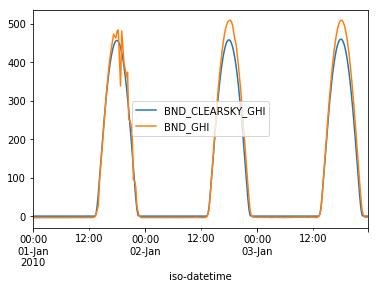

In [19]:
BND_data[0:96*3][["BND_CLEARSKY_GHI","BND_GHI"]].plot()

In [20]:
#Let's take the day of 2010-01-13 as an example
BND_data13 = BND_data[pd.to_datetime(BND_data.index).date==pd.to_datetime('2010-01-13')]
BND_data13.sample(5)

,BND_DAYTIME,BND_CLEARSKY_GHI,BND_CLOUDINESS,BND_GHI
iso-datetime,,,,
2010-01-13 15:30:00,1.0,302.468454,clear,303.840000
2010-01-13 05:00:00,0.0,0.000000,night,-3.333333
2010-01-13 14:15:00,1.0,107.144398,slightly cloudy,112.860000
2010-01-13 21:15:00,1.0,202.284568,clear,237.480000
2010-01-13 20:15:00,1.0,345.242285,clear,383.800000


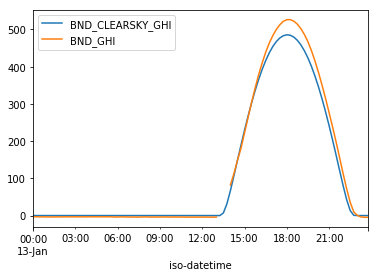

In [21]:
BND_data13[["BND_CLEARSKY_GHI","BND_GHI"]].plot()

In [22]:
#We will use fillna method to replace nans with appropriate values:
#Option 1: fill with 0
BND_data1 = BND_data.fillna(0)

#Option 2: fill with last value
BND_data21 = BND_data.fillna(method='ffill')

#Option 2: fill with last value
BND_data22 = BND_data.fillna(method='bfill')

#option 3: fill with interpolation values
BND_data31 = BND_data.interpolate(method='time')
#BND_data32 = BND_data.interpolate(method='spline', order=2)
#BND_data33 = BND_data.interpolate(method='linear',limit_direction='both')


In [23]:
#print(BND_data1[pd.to_datetime(BND_data.index).date==pd.to_datetime('2010-01-13')][0:5])
#print(BND_data2[pd.to_datetime(BND_data.index).date==pd.to_datetime('2010-01-13')][0:5])
#print(BND_data31[pd.to_datetime(BND_data.index).date==pd.to_datetime('2010-01-13')][0:5])
#print(BND_data32[pd.to_datetime(BND_data.index).date==pd.to_datetime('2010-01-13')][0:5])
#print(BND_data33[pd.to_datetime(BND_data.index).date==pd.to_datetime('2010-01-13')][0:5])


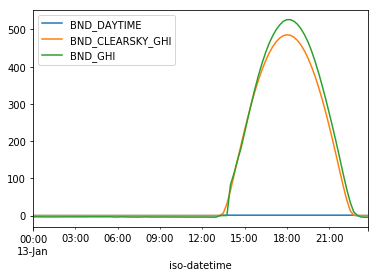

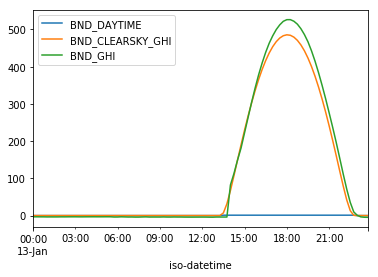

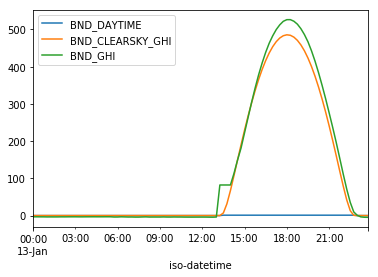

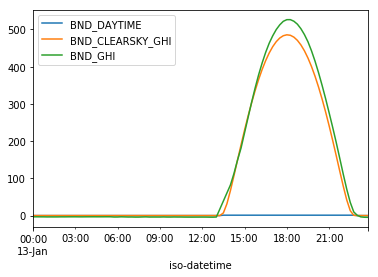

In [25]:
BND_data1[pd.to_datetime(BND_data1.index).date==pd.to_datetime('2010-01-13')].plot()
BND_data21[pd.to_datetime(BND_data21.index).date==pd.to_datetime('2010-01-13')].plot()
BND_data22[pd.to_datetime(BND_data22.index).date==pd.to_datetime('2010-01-13')].plot()
BND_data31[pd.to_datetime(BND_data31.index).date==pd.to_datetime('2010-01-13')].plot()
#BND_data32[pd.to_datetime(BND_data33.index).date==pd.to_datetime('2010-01-13')].plot()
#BND_data33[pd.to_datetime(BND_data33.index).date==pd.to_datetime('2010-01-13')].plot()

In [26]:
#Linear interpolation is smoother than the others, spline took a lot of time to run

In [50]:
#Verifying missing observations
#we shoud have 96 rows perday as we have 4 observations an hour

pd.set_option('max_rows', 1000)
missing_obs = data2.groupby([pd.to_datetime(data2.index).year,pd.to_datetime(data2.index).month,pd.to_datetime(data2.index).day]).size()
print("Missing obs within a day :", obs[obs<96])
missing_day = data2.groupby([pd.to_datetime(data2.index).year]).size() #,pd.to_datetime(data2.index).month
print("Missing day :", missing_day/(96))

#obs[obs!=96]

Missing obs within a day : Series([], dtype: int64)
Missing day : iso-datetime
2010    365.0
2011    365.0
2012    366.0
2013    365.0
2014    365.0
2015    365.0
dtype: float64


In [51]:
#Conclusion, no day missing nor an observation is missing during the 6 years period

In [54]:
#Put all together

In [ ]:
def preprocessing(data):
    #1-replacing nan's
    
    #2-refilling missing data
    
    #3-removing night time obs
        #- Night data: _DAYTIME = 0
        #- Data without images
    
    #4-Data normalization
    
    return clean_data

In [ ]:
#We have 36619 rows without nCDF images